### Detection of Voyager 1 Signal

#### Import Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy

from blimpy import Waterfall

In [2]:
# Need this to automatically show plots
%matplotlib inline

#### Load the .fil data acquired from BL website

##### Testing this on other .fil data

In [3]:
obs = Waterfall('guppi_58060_33331_HIP17405_0041.gpuspec.0001.fil')

blimpy.io.base_reader WARNING  Very low on memory, only 337.07 MB available for use.


In [4]:
obs.info()


--- File Info ---
     rawdatafile : guppi_58060_33331_HIP17405_0041.0000.raw
     source_name :                         HIP17405
      machine_id :                               20
    telescope_id :                                6
         src_raj :                      3:43:45.384
         src_dej :                      16:39:53.64
        az_start :                              0.0
        za_start :                              0.0
       data_type :                                1
            fch1 :             6188.78173828125 MHz
            foff :                -0.3662109375 MHz
          nchans :                              512
          nbeams :                                1
           ibeam :                                1
           nbits :                               32
   tstart (ISOT) :          2017-11-03T09:15:31.000
    tstart (MJD) :               58060.385775462964
           tsamp :            0.0003495253333333333
            nifs :                   

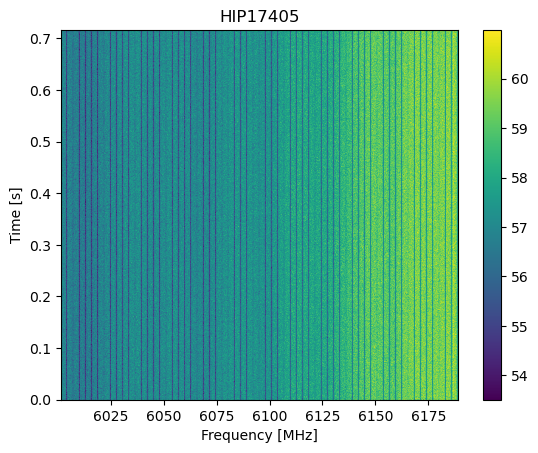

In [113]:
obs.plot_waterfall()

extracting integration 200...


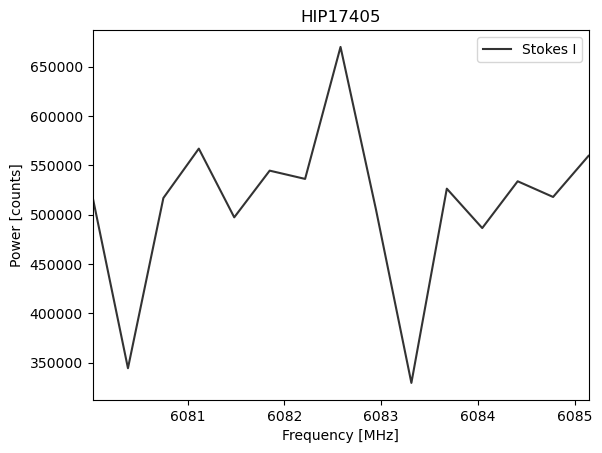

In [10]:
obs.plot_spectrum(t = 200, f_start = 6080, f_stop = 6085)

### Ok, now for the real show

In [11]:
vger = Waterfall('Voyager1.single_coarse.fine_res.fil')

blimpy.io.base_reader WARNING  Very low on memory, only 331.49 MB available for use.


In [12]:
vger.info()


--- File Info ---
    telescope_id :                                6
        az_start :                              0.0
      machine_id :                               20
     source_name :                         Voyager1
       data_type :                                1
          nchans :                          1048576
           ibeam :                                1
           tsamp :                     18.253611008
            foff :      -2.7939677238464355e-06 MHz
         src_raj :                     17:10:03.984
         src_dej :                       12:10:58.8
   tstart (ISOT) :          2016-09-19T18:46:13.000
    tstart (MJD) :                57650.78209490741
          nbeams :                                1
            fch1 :            8421.386717353016 MHz
        za_start :                              0.0
     rawdatafile : guppi_57650_67573_Voyager1_0002.0000.raw
            nifs :                                1
           nbits :                   

#### Plot Spectrum

extracting integration 0...


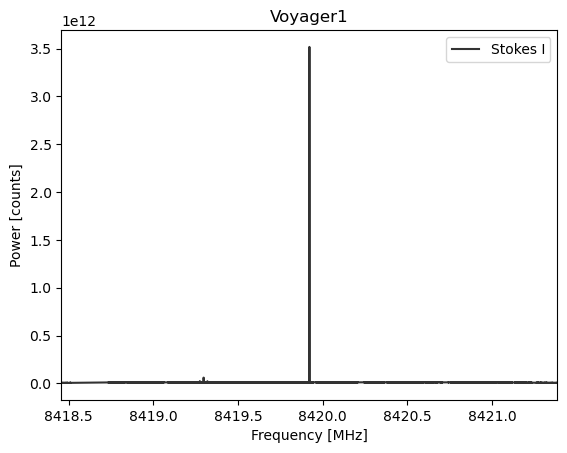

In [13]:
vger.plot_spectrum(t=0)

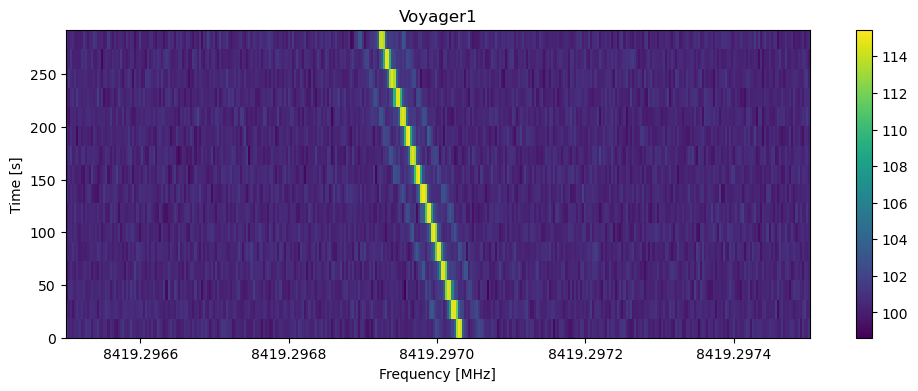

In [53]:
plt.figure(figsize = (12,4))
vger.plot_waterfall(f_start = 8419.2965, f_stop = 8419.2975)

extracting integration 0...
extracting integration 14...


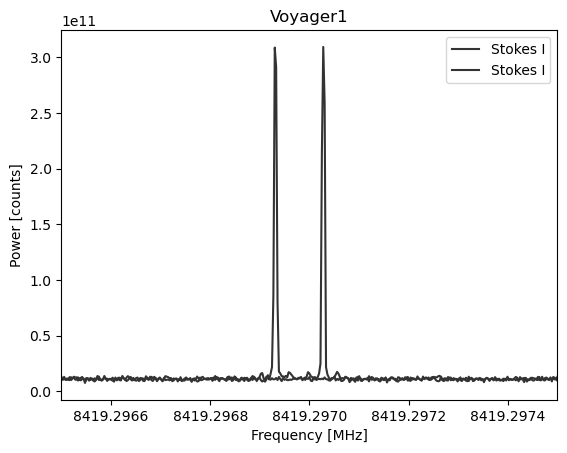

In [43]:
vger.plot_spectrum(t=0, f_start = 8419.2965, f_stop = 8419.2975)
vger.plot_spectrum(t=14, f_start = 8419.2965, f_stop = 8419.2975)

extracting integration 0...
extracting integration 1...
extracting integration 2...
extracting integration 3...
extracting integration 4...
extracting integration 5...
extracting integration 6...
extracting integration 7...
extracting integration 8...
extracting integration 9...
extracting integration 10...
extracting integration 11...
extracting integration 12...
extracting integration 13...
extracting integration 14...
extracting integration 15...


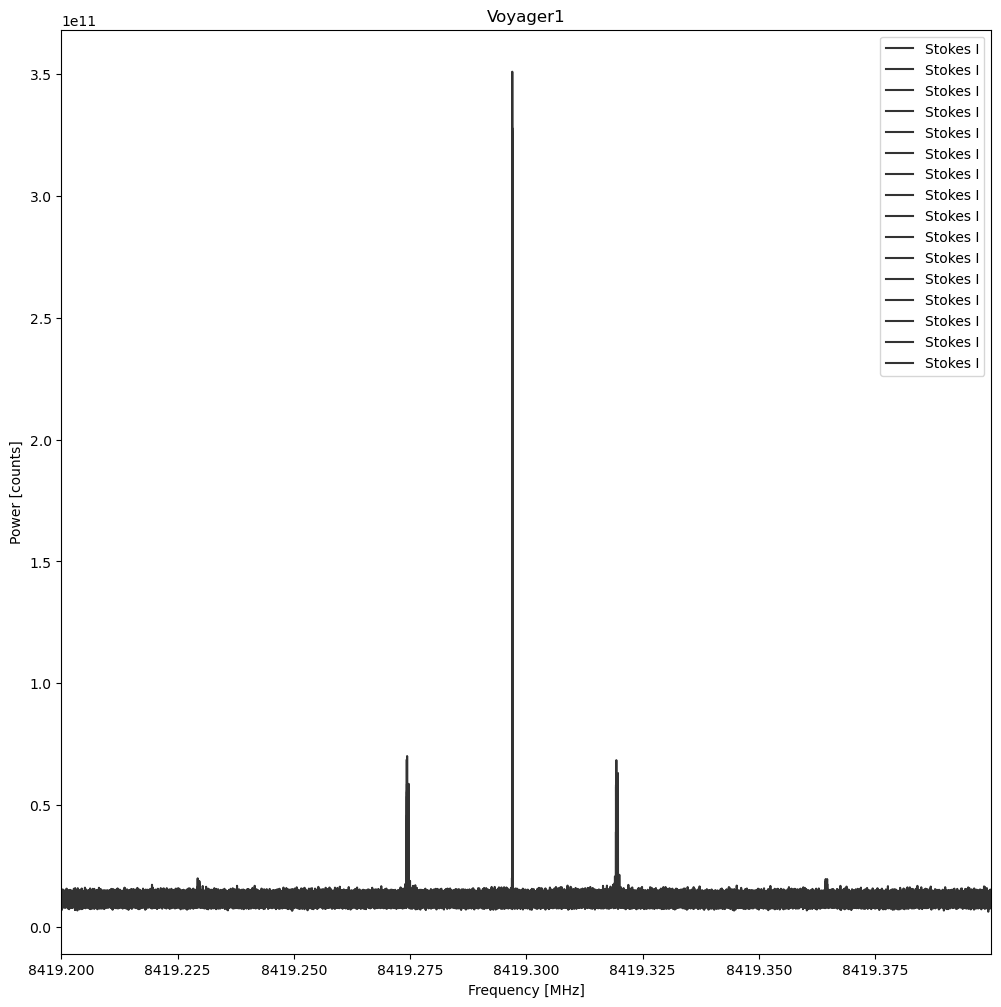

In [52]:
plt.figure(figsize = (12,12))
for i in range(16):
    vger.plot_spectrum(t=i, f_start = 8419.2, f_stop = 8419.4)
plt.show()

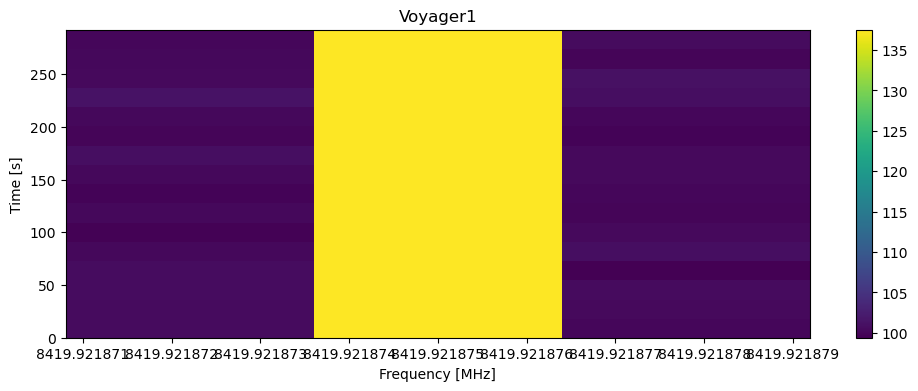

In [26]:
plt.figure(figsize = (12,4))
vger.plot_waterfall(f_start = 8419.9218700, f_stop = 8419.9218775)

extracting integration 0...


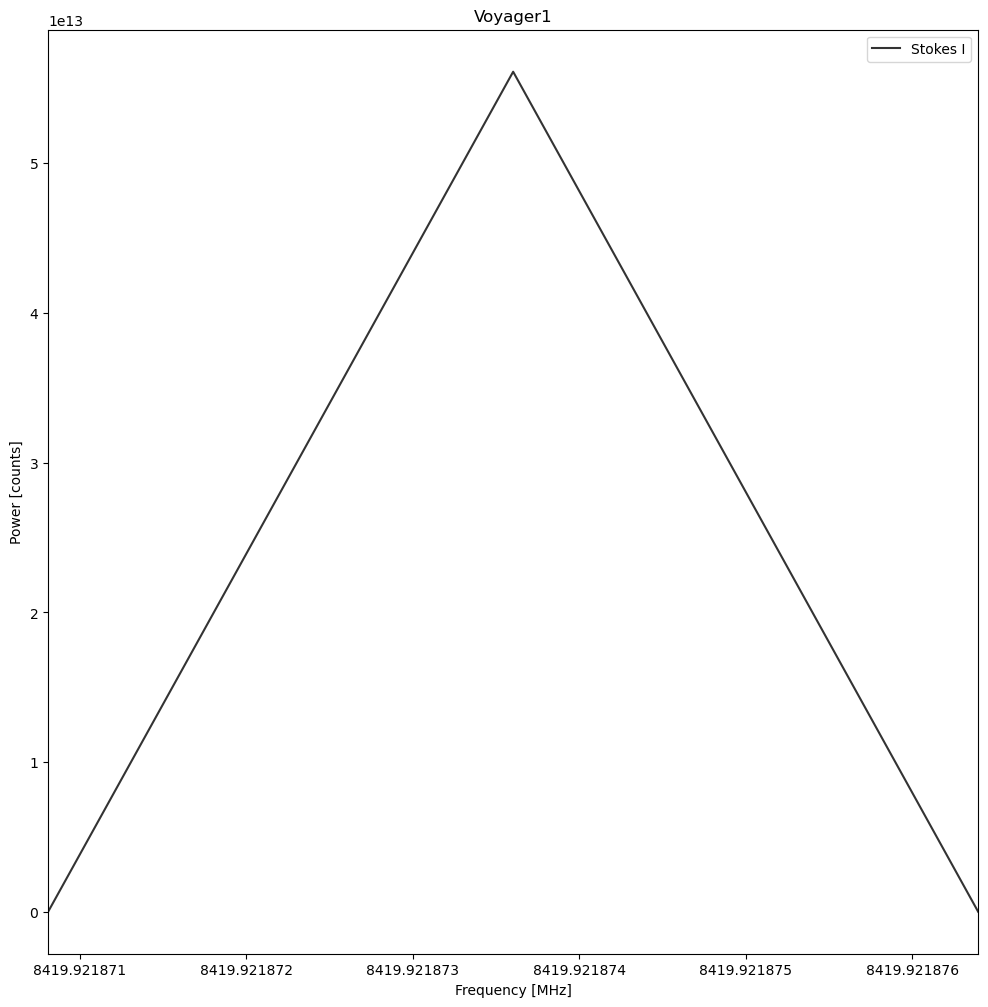

In [55]:
plt.figure(figsize = (12,12))
vger.plot_spectrum(t=0, f_start = 8419.9218700, f_stop = 8419.9218775)

In [88]:
t0 = vger.grab_data(f_start = 8419.2965, f_stop = 8419.2975)[1][0]
t0[t0 > 1e+11]

array([2.5897841e+11, 3.0933323e+11, 2.1373193e+11], dtype=float32)

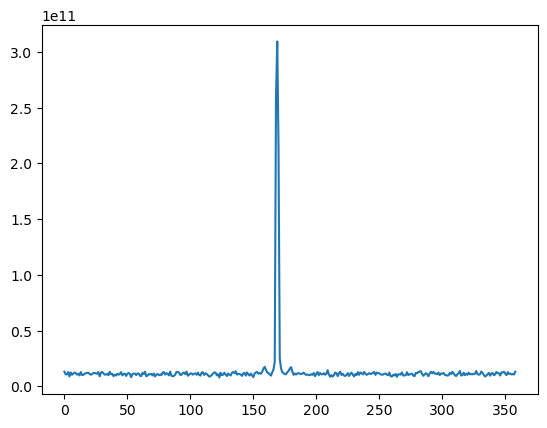

In [84]:
plt.plot(t0)

In [101]:
tsf = zip(vger.grab_data(f_start = 8419.2965, f_stop = 8419.2975)[0],vger.grab_data(f_start = 8419.2965, f_stop = 8419.2975)[1][0])
df0 = pd.DataFrame(tsf, columns=('freq','counts'))

In [102]:
df0[df0.counts>1e+11]

,freq,counts
168,8419.297031,2.589784e+11
169,8419.297028,3.093332e+11
170,8419.297025,2.137319e+11


In [103]:
tsf = zip(vger.grab_data(f_start = 8419.2965, f_stop = 8419.2975)[0],vger.grab_data(f_start = 8419.2965, f_stop = 8419.2975)[1][15])
df15 = pd.DataFrame(tsf, columns=('freq','counts'))

In [104]:
df15[df15.counts>1e+11]

,freq,counts
205,8419.296927,2.144070e+11
206,8419.296924,2.742574e+11
207,8419.296922,2.532346e+11


In [111]:
kt = df0.freq[169] - df15.freq[206]
kt

0.00010337680578231812

In [112]:
kt/(300-18.75)

3.6756197611490887e-07